In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data and parameters to use

In [10]:
# Read in the data
df_projects = pd.read_csv('data/projectList.csv')
# Drop Title, ArticleURL columns
df_projects.drop(['Title', 'ArticleURL'], axis=1, inplace=True)
df_projects.head()

if True:
    # Drop rows with year >= 2021
    df_projects = df_projects[df_projects['Year'] < 2021]
    df_projects.rename(columns={'Alternative projects from the community':'Community'}, inplace=True)



In [11]:
# Function to get the number of projects by year
def get_projects_by_year(df_filtered):
    df_projects_year=df_filtered.copy(deep=True)
    df_projects_year.drop(['Family', 'Language', 'glottocode', 'isocode', 'Speakers'], axis=1, inplace=True)
    df_projects_year.drop_duplicates(inplace=True)
    df_projects_year=df_projects_year.groupby(['Year']).agg({'Project':'count', 'Cinema/TV':'sum', 'Social media':'sum', 'Radio':'sum', 'Music':'sum', 'Technology':'sum', 'Teaches the language':'sum', 'State initiative':'sum', 'External organization':'sum', 'Universities and institutes':'sum', 'Community':'sum', 'Documentation': 'sum', 'Books and educative material': 'sum', 'Promotes use of the language': 'sum'}).reset_index().drop_duplicates()
    return df_projects_year

In [12]:
# Function to get the number of projects by country
def get_projects_by_country():
    df_project_by_country=df_projects.copy(deep=True)
    df_project_by_country["nLanguages"] = df_project_by_country.groupby("Project")["Language"].transform("nunique")
    df_project_by_country.drop(['Family', 'Language', 'glottocode', 'isocode','Speakers'], axis=1, inplace=True)
    df_project_by_country.drop_duplicates(inplace=True)
    return df_project_by_country

In [13]:
# Define the list of columns to filter
origin_columns = ['State initiative', 'External organization', 'Universities and institutes', 'Community']
characteristics_columns = ["Cinema/TV", "Social media", "Radio", "Music", "Technology", "Teaches the language", "Documentation", "Books and educative material"]

## sns configuration

In [14]:
# Set the style of the plots
sns.set_style("darkgrid")

# Define the color palette
color_palette = sns.color_palette("husl", 4)

# Define a color for each category using Seaborn's color palette
color_dict = {
    'State initiative': sns.color_palette("husl", 4)[0],
    'External organization': sns.color_palette("husl", 4)[1],
    'Universities and institutes': sns.color_palette("husl", 4)[2],
    'Community': sns.color_palette("husl", 4)[3]
}

# Set the global parameters for the plots
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'light'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'light'

# Plots

## Projects by year and main actor

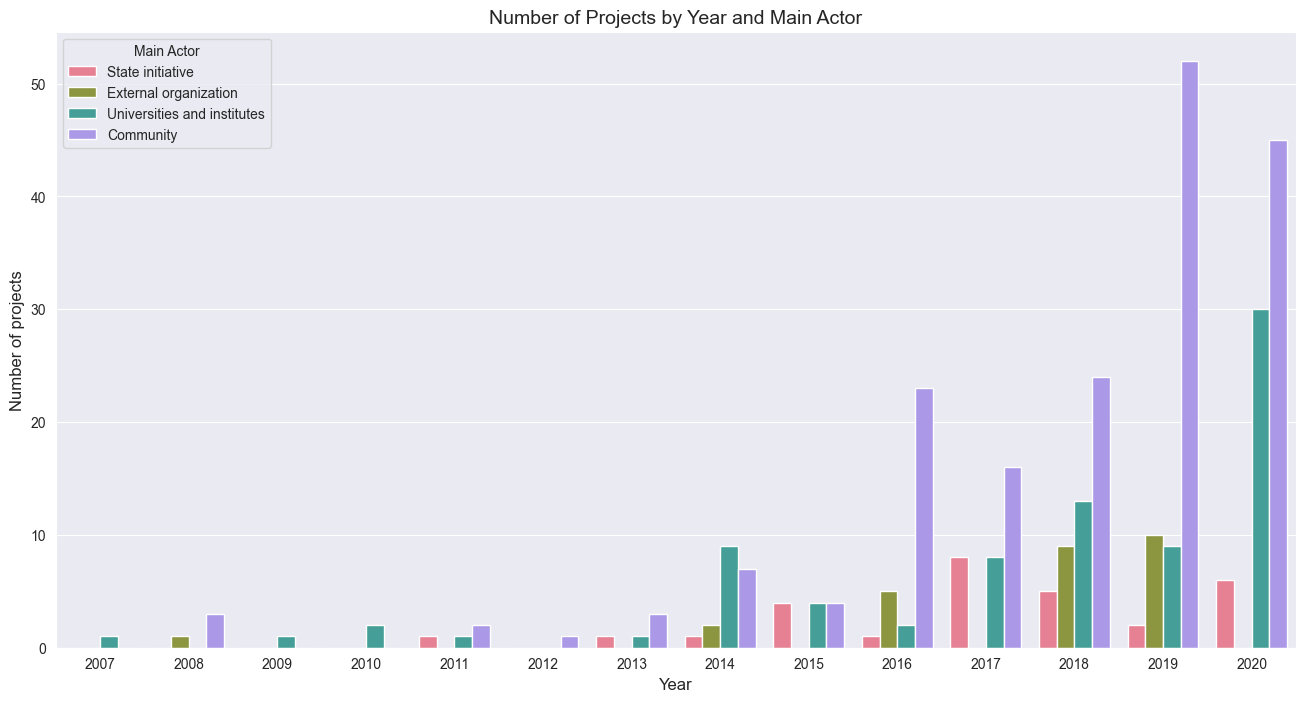

In [45]:
# Get the number of projects by year
df = get_projects_by_year(df_projects)

# Melt the DataFrame into a long format
df_melted = pd.melt(df, id_vars='Year', value_vars=origin_columns)

# Plot the data
plt.figure(figsize=(16, 8))
sns.barplot(data=df_melted, x='Year', y='value', hue='variable', palette=color_dict)
plt.title('Number of Projects by Year and Main Actor')
plt.ylabel('Number of projects')
plt.xlabel('Year')
plt.legend(title='Main Actor')
plt.savefig('images/number_of_projects_by_year_and_origin.png', dpi=300, bbox_inches='tight')
plt.show()

## Top 30 languages with most projects

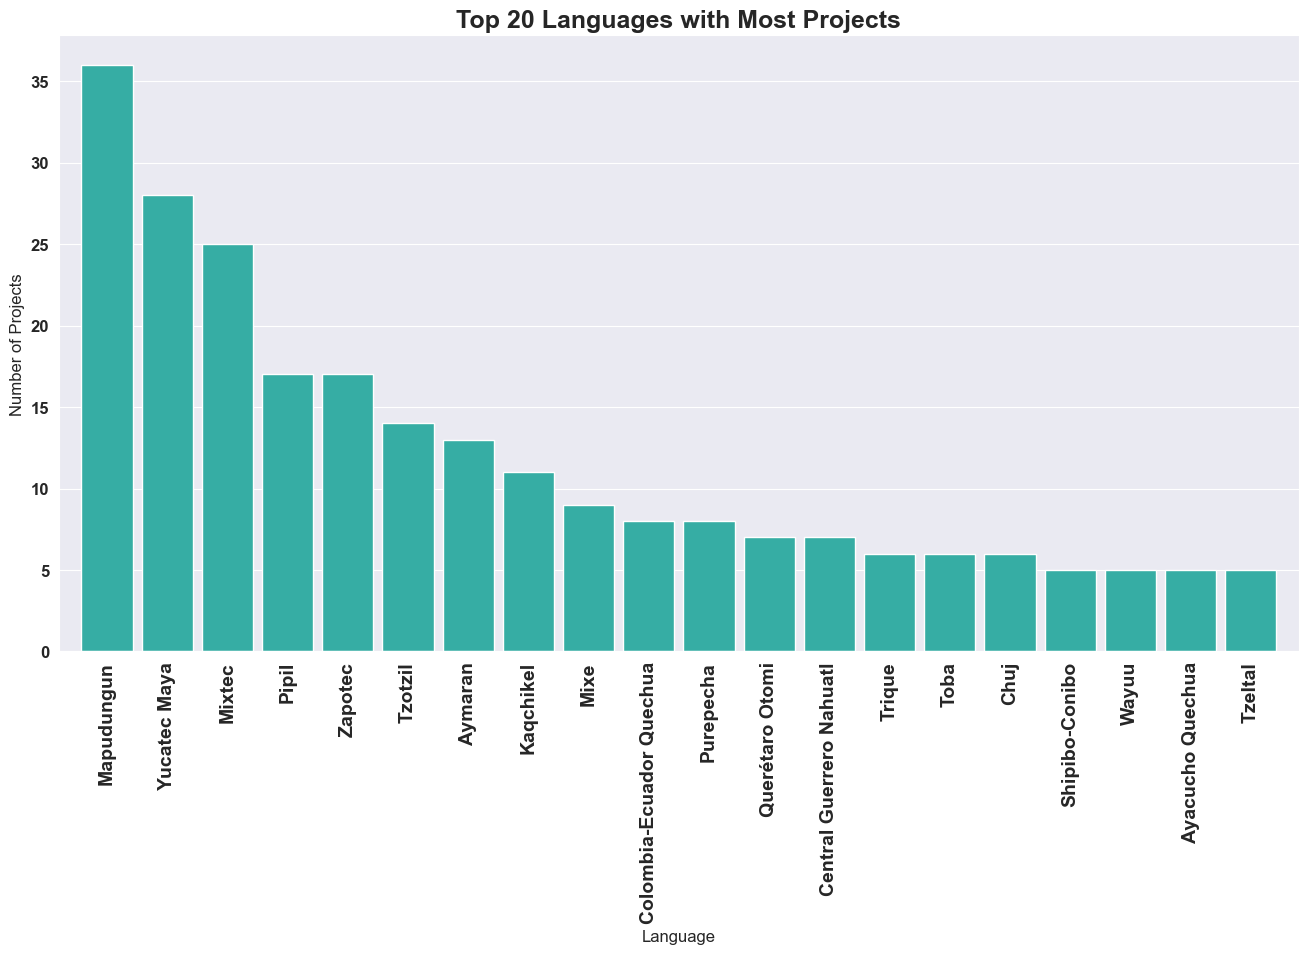

In [46]:
# Group by 'Lengua', count, reset index, and sort
df_grouped = df_projects.groupby('Language').count().reset_index().sort_values(by='Project', ascending=False)

# Filter to include only the top 20 languages
df_filtered = df_grouped[0:20]

# Plot the data
plt.figure(figsize=(16, 8))
plt.bar(df_filtered['Language'], df_filtered['Project'], color=sns.color_palette("husl", 4)[2], width=0.85)
plt.xlabel('Language')
plt.ylabel('Number of Projects', fontsize=12)
plt.xticks(rotation='vertical', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('Top 20 Languages with Most Projects', fontsize=18, fontweight='bold')

# Adjust the x-axis limits
plt.xlim(-0.8, len(df_filtered['Language'])-0.2)
# Keep only horizontal grid lines
plt.grid(axis='x')

plt.savefig('images/top_30_languages_with_most_projects.png', dpi=300, bbox_inches='tight')
plt.show()

## Projects by country

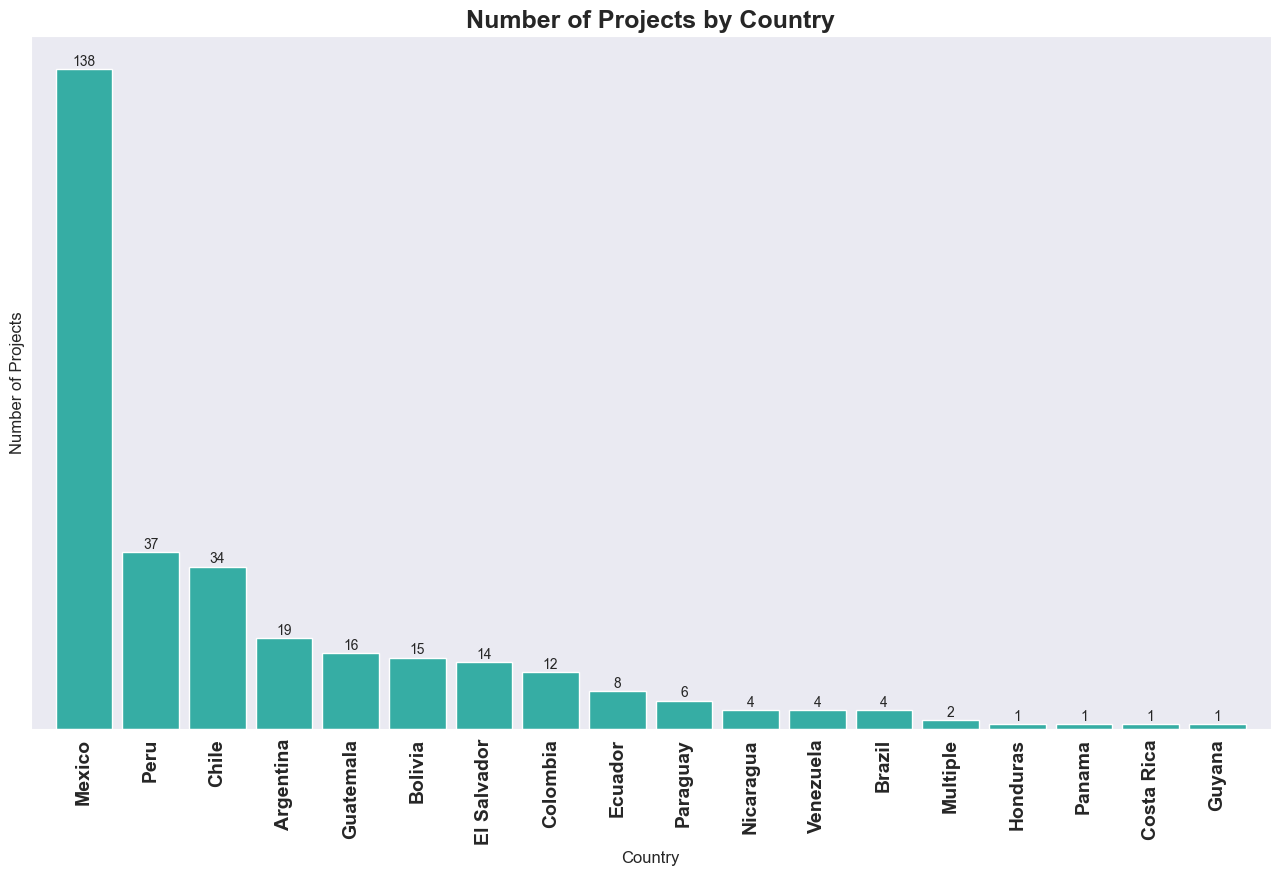

In [15]:
df_projects_country = get_projects_by_country()
# Group the data, count the projects, reset the index, and sort the values
df_grouped = df_projects_country.groupby('Country').count().reset_index().sort_values(by='Project', ascending=False)

# Rename Varios to Others
df_grouped['Country'] = df_grouped['Country'].replace('Varios', 'Multiple')

# Plot the data
plt.figure(figsize=(16, 9))
bars = plt.bar(df_grouped['Country'], df_grouped['Project'], color=sns.color_palette("husl", 4)[2], width=0.85)

# Add the number values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

# Remove the y-axis
plt.yticks([])
# Keep only horizontal grid lines
plt.grid(axis='x')

# Adjust the x-axis limits
plt.xlim(-0.8, len(df_grouped['Country'])-0.2)

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Projects')
plt.xticks(rotation='vertical', fontsize=14, fontweight='bold')
plt.title('Number of Projects by Country', fontsize=18, fontweight='bold')
plt.savefig('images/number_of_projects_by_country.png', dpi=300, bbox_inches='tight')
plt.show()


In [23]:
world

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


C:\Users\amy22\AppData\Local\Temp\ipykernel_1976\3887540385.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world.geometry.centroid


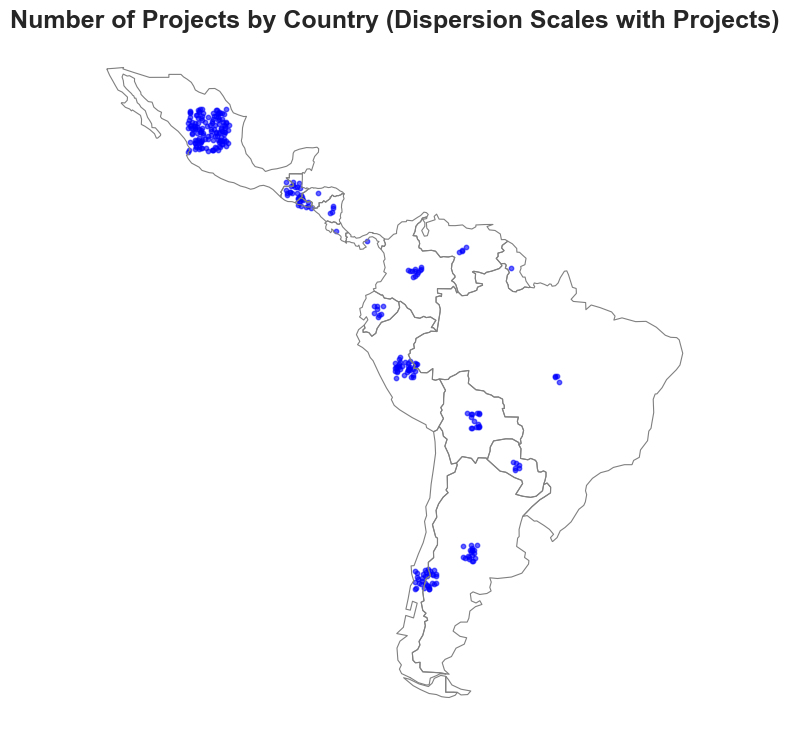

In [57]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load world map
world = gpd.read_file('data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Identify the correct column for country names
world = world.merge(df_grouped, left_on='ADMIN', right_on='Country')

# Remove 'Multiple' entries
world = world[world['Country'] != 'Multiple']

# Get country centroids
world['centroid'] = world.geometry.centroid

# Prepare scatter plot data
points_x = []
points_y = []

for _, row in world.iterrows():
    num_projects = int(row['Project'])  # Number of projects in the country
    centroid_x, centroid_y = row['centroid'].x, row['centroid'].y

    # Define dispersion based on number of projects
    dispersion = 0.1 + 0.25 * np.sqrt(num_projects)  # Limits max spread

    # Generate points with scaled dispersion
    points_x.extend(centroid_x + np.random.uniform(-dispersion, dispersion, num_projects))
    points_y.extend(centroid_y + np.random.uniform(-dispersion, dispersion, num_projects))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
world.boundary.plot(ax=ax, linewidth=0.8, color="gray")

# Scatter plot with variable dispersion
ax.scatter(points_x, points_y, color='blue', alpha=0.6, s=10)  # Adjust `s` for point size

plt.title('Number of Projects by Country (Dispersion Scales with Projects)', fontsize=18, fontweight='bold')
plt.axis('off')
plt.savefig('images/number_of_projects_by_country_scaled_dots.png', dpi=300, bbox_inches='tight')
plt.show()


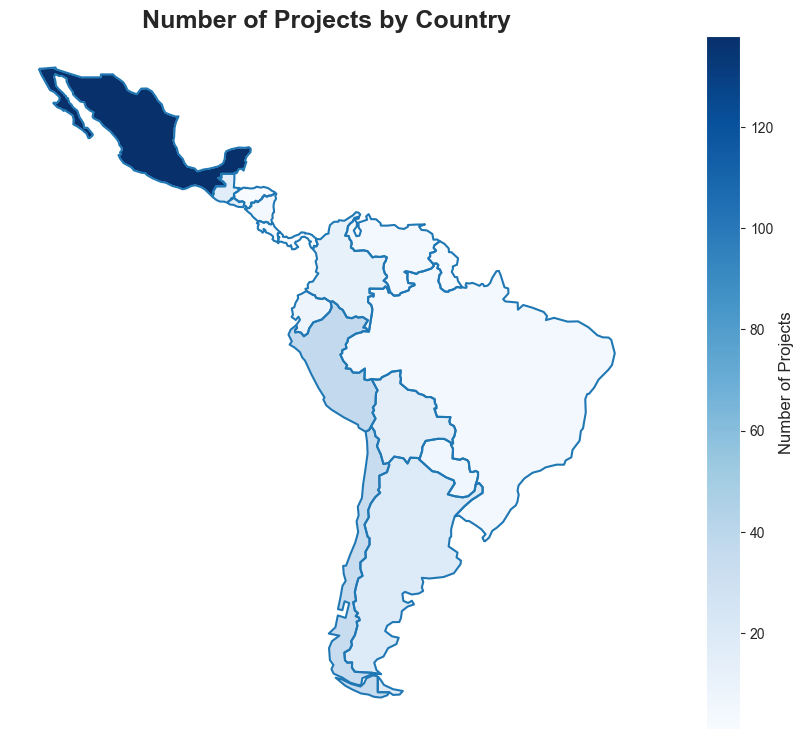

In [68]:
# I want to plot the number of project by country in a map. The "Multiple" country should be ignored. You can try ploting a circle that gets bigger with the number of projects
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the world map
world = gpd.read_file('data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Merge the world map with the data
world = world.merge(df_grouped, left_on='ADMIN', right_on='Country')

# Filter the data to exclude the 'Multiple' country
world = world[world['Country'] != 'Multiple']

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
world.boundary.plot(ax=ax)
world.plot(column='Project', ax=ax, cmap='Blues', legend=True, legend_kwds={'label': "Number of Projects"})
plt.title('Number of Projects by Country', fontsize=18, fontweight='bold')
plt.axis('off')
plt.savefig('images/number_of_projects_by_country_map.png', dpi=300, bbox_inches='tight')

C:\Users\amy22\AppData\Local\Temp\ipykernel_1976\394663437.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world.geometry.centroid
C:\Users\amy22\AppData\Local\Temp\ipykernel_1976\394663437.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['x'] = world.centroid.x
C:\Users\amy22\AppData\Local\Temp\ipykernel_1976\394663437.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['y'] = world.centroid.y


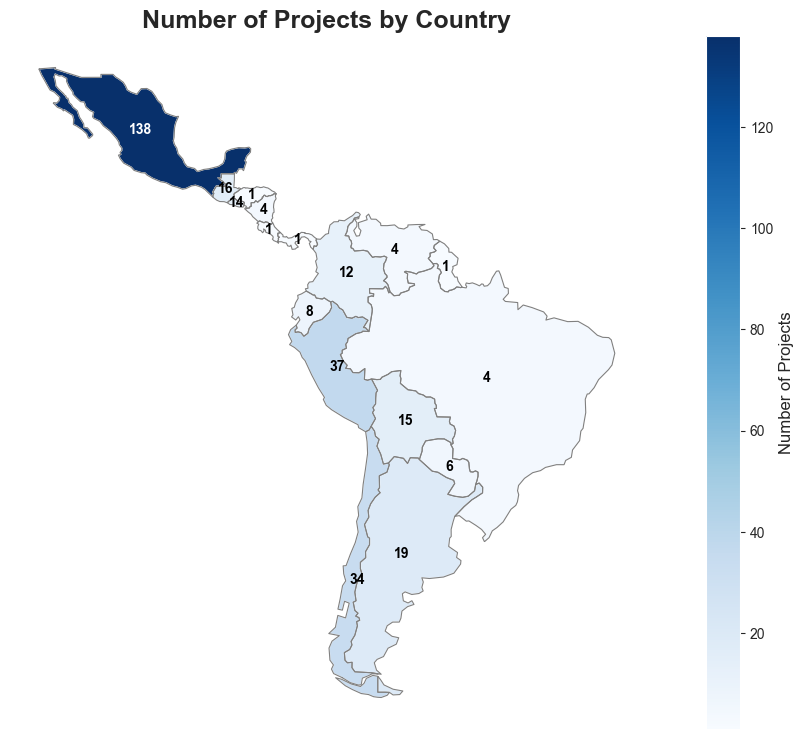

In [72]:
# Read the world map
world = gpd.read_file('data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Merge with project data
world = world.merge(df_grouped, left_on='ADMIN', right_on='Country')

# Remove 'Multiple' entries
world = world[world['Country'] != 'Multiple']

# Compute centroids
world['centroid'] = world.geometry.centroid
world['x'] = world.centroid.x
world['y'] = world.centroid.y

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
world.boundary.plot(ax=ax, linewidth=0.8, color="gray")
world.plot(column='Project', ax=ax, cmap='Blues', legend=True, 
           legend_kwds={'label': "Number of Projects"})

# Add text labels with dynamic color
for _, row in world.iterrows():
    text_color = 'white' if row['Project'] > 100 else 'black'  # Change color if > 100
    ax.text(row['x'], row['y'], str(row['Project']), fontsize=10, 
            ha='center', va='center', fontweight='bold', color=text_color)

# Title and adjustments
plt.title('Number of Projects by Country', fontsize=18, fontweight='bold')
plt.axis('off')
plt.savefig('images/number_of_projects_by_country_map.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\amy22\AppData\Local\Temp\ipykernel_1976\2072442795.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world.geometry.centroid
C:\Users\amy22\AppData\Local\Temp\ipykernel_1976\2072442795.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['x'] = world.centroid.x
C:\Users\amy22\AppData\Local\Temp\ipykernel_1976\2072442795.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['y'] = world.centroid.y


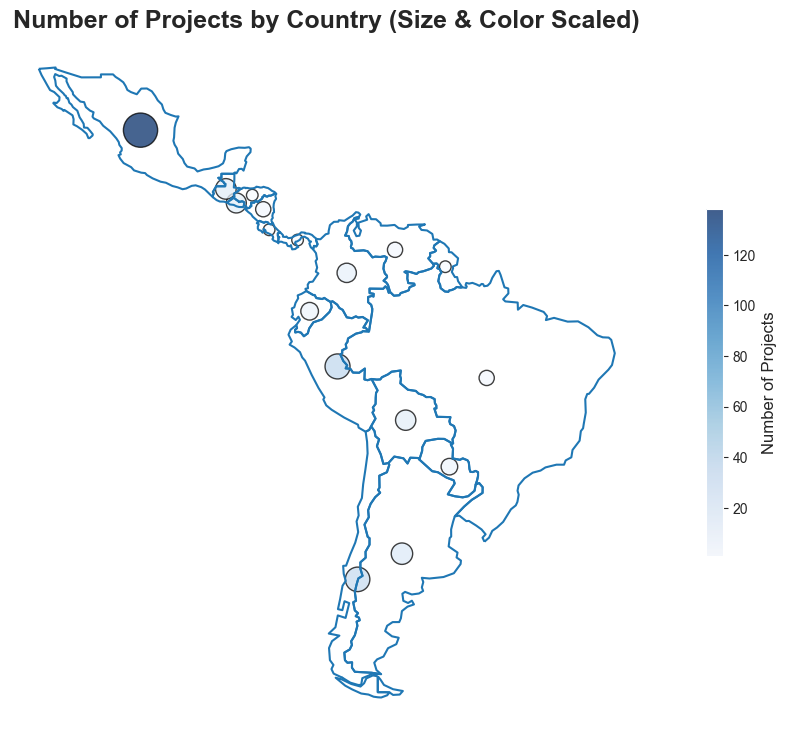

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load world map
world = gpd.read_file('data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Identify the correct column for country names
world = world.merge(df_grouped, left_on='ADMIN', right_on='Country')

# Remove 'Multiple' entries
world = world[world['Country'] != 'Multiple']

# Get country centroids
world['centroid'] = world.geometry.centroid

# Extract coordinates and project numbers
world['x'] = world.centroid.x
world['y'] = world.centroid.y
world['size'] = 20 + 50 * np.sqrt(world['Project'])# Scale size with sqrt
world['color'] = world['Project']  # Use project count for color

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
world.boundary.plot(ax=ax)

# Scatter plot: size & color scale with number of projects
sc = ax.scatter(world['x'], world['y'], s=world['size'], 
                c=world['color'], cmap='Blues', alpha=0.75, edgecolors='black')

# Colorbar for reference
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.5)
cbar.set_label("Number of Projects")

plt.title('Number of Projects by Country (Size & Color Scaled)', fontsize=18, fontweight='bold')
plt.axis('off')
plt.savefig('images/number_of_projects_scaled.png', dpi=300, bbox_inches='tight')
plt.show()


## Projects by country and origin

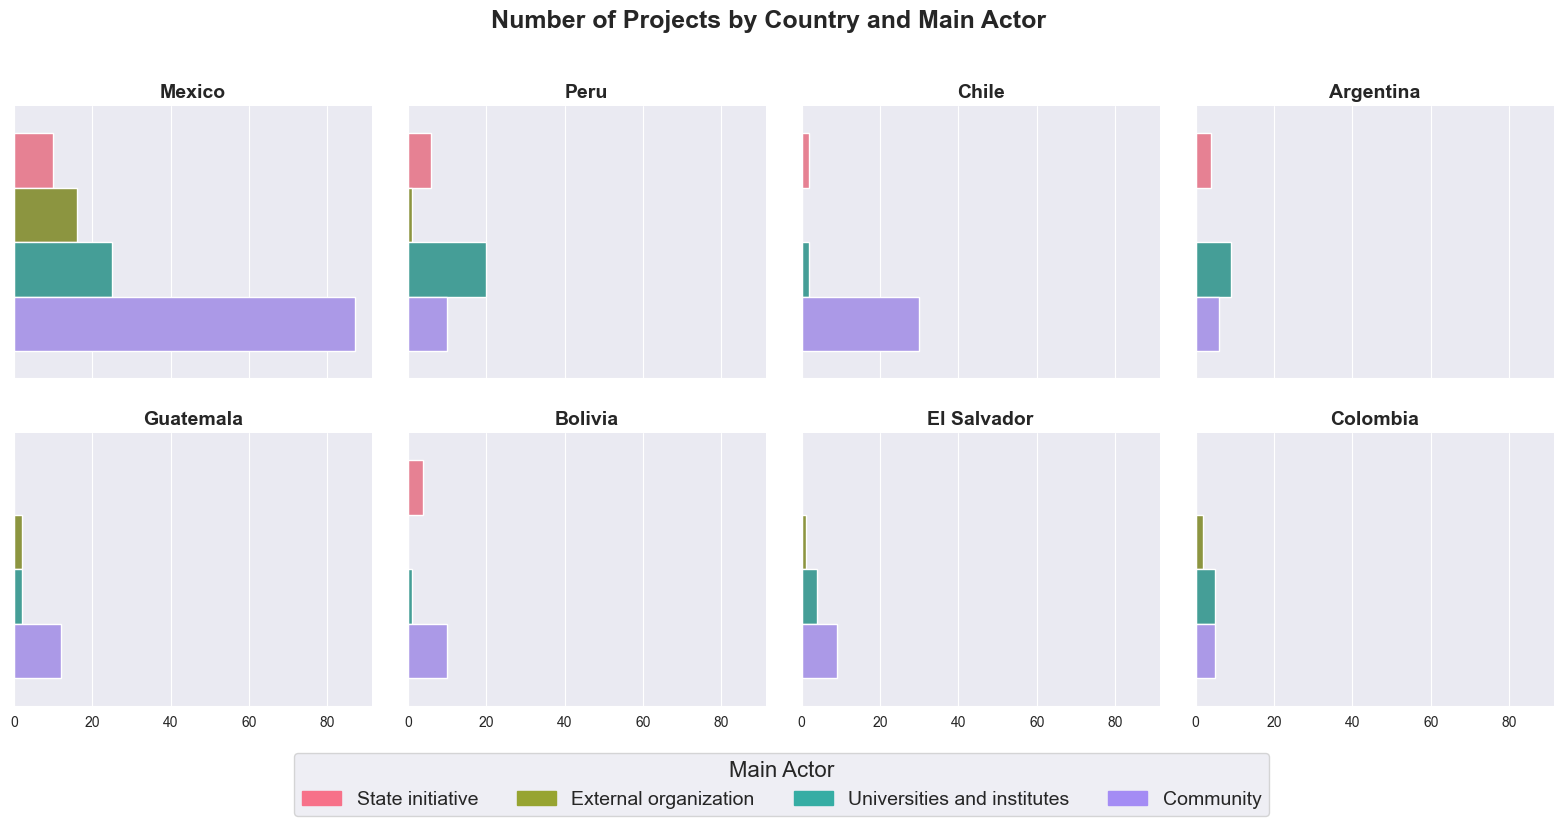

In [48]:
import matplotlib.patches as mpatches

df_projects_country = get_projects_by_country()
# Group the data, count the projects, reset the index, and sort the values
df_grouped = df_projects_country.groupby('Country').agg({
    'Project': 'count',
    'State initiative': 'sum',
    'External organization': 'sum',
    'Universities and institutes': 'sum',
    'Community': 'sum'
}).reset_index().sort_values(by='Project', ascending=False)


top_9 = df_grouped.head(8)
df_melted = top_9.melt(id_vars='Country', value_vars=['State initiative', 'External organization', 'Universities and institutes', 'Community'], var_name='Origin', value_name='Number of Projects')

# Create the catplot
g = sns.catplot(
    x='Number of Projects', 
    y='Origin', 
    hue='Origin', 
    data=df_melted, 
    kind='bar', 
    height=4, 
    aspect=1, 
    palette=color_dict,
    col_wrap=4,
    col='Country',
    sharey=True,
    orient='h',
    formatter= lambda x: "",
    legend=False
)


# Set the title for the entire plot
g.figure.suptitle('Number of Projects by Country and Main Actor', fontsize=18, y=1.02, fontweight='bold')
g.set_titles('{col_name}')
g.set_axis_labels('' ,'')

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontweight='bold')

unique_origins = df_melted['Origin'].unique()
handles = [mpatches.Patch(color=color_dict[origin], label=origin) for origin in unique_origins]
labels = unique_origins
g.fig.legend(
    handles, labels, 
    title='Main Actor',
    loc='lower center', 
    ncol=len(labels), 
    fontsize=14,
    title_fontsize=16
)

# Adjust the layout to make room for the legend
plt.subplots_adjust(bottom=0.15, top=0.9, wspace=0.1, hspace=0.2)

# Save the plot
g.savefig('images/number_of_projects_by_country_and_origin.png', dpi=300, bbox_inches='tight')
plt.show()


## Correlation between number of speakers and number of projects

In [54]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare the data
#Exclude "Quechuan" and "Paraguayan Guarani" because they are outliers
df = df_projects.copy(deep=True)
df = df_projects[df_projects['Language'] != 'Quechuan']
df = df[df['Language'] != 'Paraguayan Guaraní']
df = df.groupby('Language').agg({'Speakers':'first', 'Project':'count', 'Family':'first', 'Country':'first', 'State initiative':'sum', 'External organization':'sum', 'Universities and institutes':'sum', 'Community':'sum'}).reset_index()

df['Adjusted Project'] = df['Project']+2

# Create the correlation plot
fig = px.scatter(df, x='Speakers', y='Project', size='Adjusted Project', color='Family', hover_data=['Language', 'Project'], height=800, size_max=40, title='Number of Speakers vs Number of Projects')


# Prepare the data for the regression model
X = df['Speakers'].values.reshape(-1, 1)

y = df['Project'].values

#Find regression line
# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Print the R^2 value
print('R^2:', model.score(X, y))

# Create a trace for the regression line
trace = go.Scatter(x=df['Speakers'], y=y_pred, mode='lines', name='Regression Line')

# Add the regression line to the plot
# fig.add_trace(trace)

#Rename the legend title 
fig.update_layout(
    legend_title_text='Language Family',
    legend_title_font=dict(size=18, family='Arial', color='Black'),
    font=dict(size=16, family='Arial', color='Black'),
    showlegend=True
)

#Rename the axes
fig.update_xaxes(
    title_text='Number of Speakers',
    title_font=dict(size=18, family='Arial', color='Black'),
    tickfont=dict(size=14, family='Arial', color='Black')
)
fig.update_yaxes(
    title_text='Number of Projects',
    title_font=dict(size=18, family='Arial', color='Black'),
    tickfont=dict(size=14, family='Arial', color='Black')
)

#Hide the legend
fig.update_layout(showlegend=False)

#Write the name of the language in the circle for the 11 languages with the most projects
top_11 = df.nlargest(11, 'Project')
for i in range(11):
    fig.add_annotation(x=top_11.iloc[i]['Speakers'], y=top_11.iloc[i]['Project'], text=top_11.iloc[i]['Language'], showarrow=True,arrowhead=2, yshift=5, font=dict(size=14, color='Black', family='Arial', weight='bold'))

# Show the plot
fig.show()

R^2: 0.08078754387701692


## Projects by year and domain

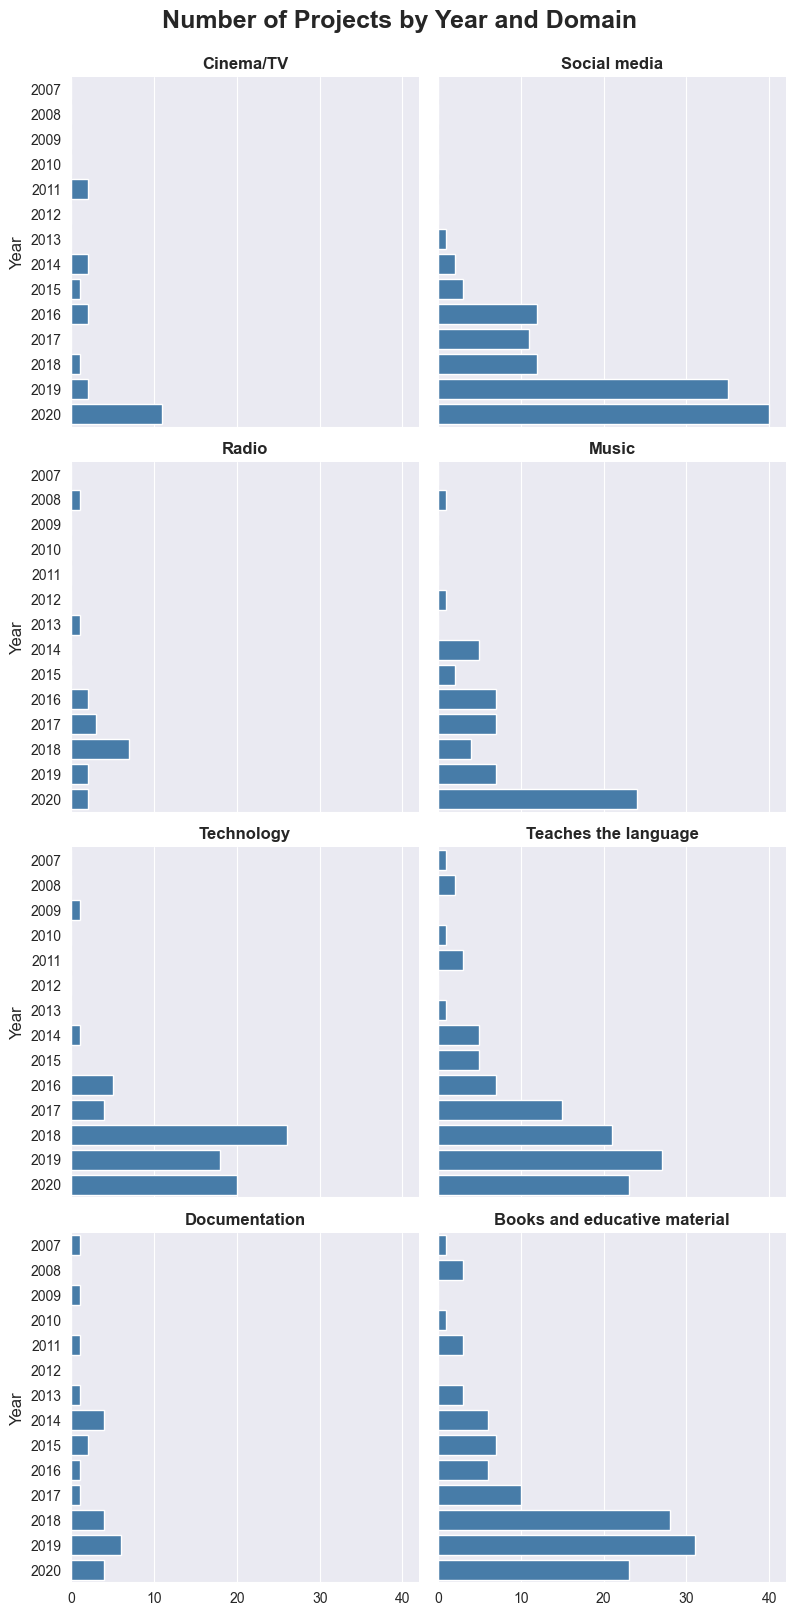

In [53]:
df = get_projects_by_year(df_projects)
df_melted = df.melt(id_vars='Year', value_vars=characteristics_columns, var_name='Domain', value_name='Number of Projects')

# Create the catplot
g = sns.catplot(x='Number of Projects', y='Year', col='Domain', data=df_melted, kind='bar', col_wrap=2, height=4, aspect=1, sharey=True, orient='h', color='#377eb8')

# Set the titles for each subplot
g.set_titles("{col_name}", fontweight='bold')

# Set the labels for the x and y axes
g.set_axis_labels("", "Year")

# Set the title for the entire plot
g.figure.suptitle('Number of Projects by Year and Domain', fontsize=18, y=1.02, fontweight='bold')

# Save the plot
g.savefig('images/number_of_projects_by_year_and_characteristic.png', dpi=300, bbox_inches='tight')
plt.show()

## Number of projects and their main actor through the years

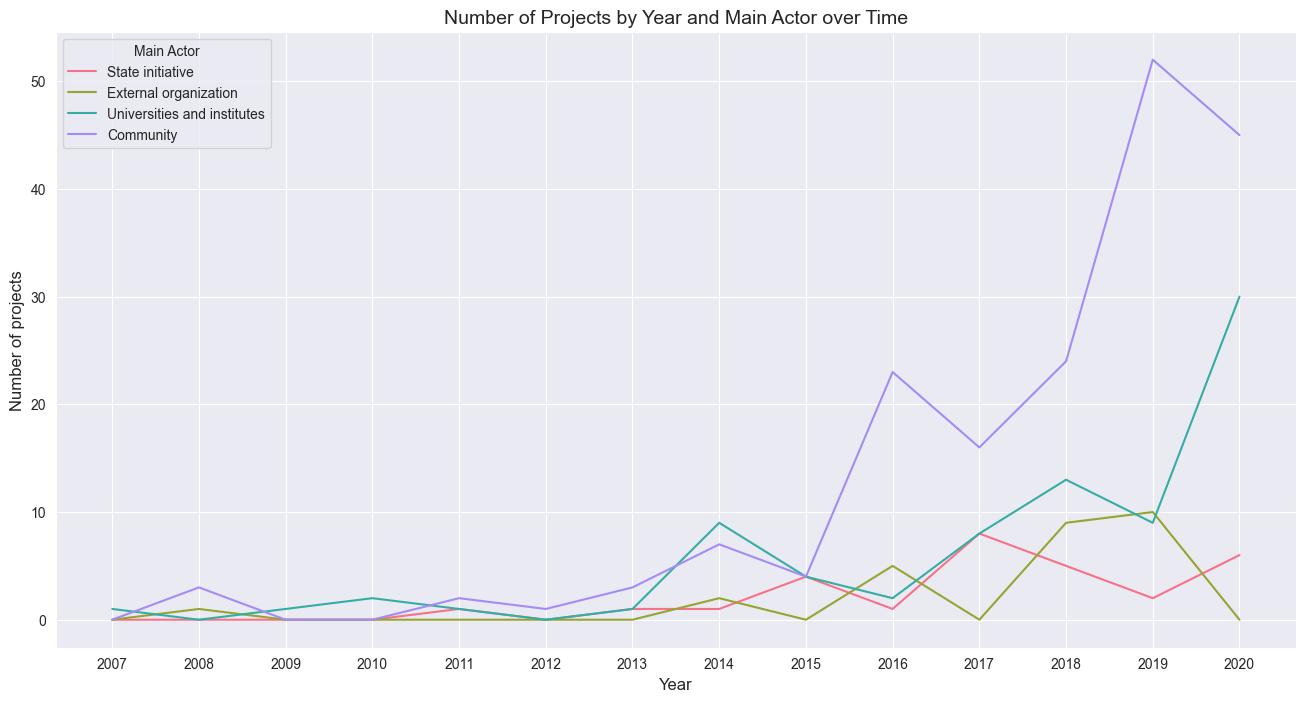

In [51]:
df = get_projects_by_year(df_projects)

# Melt the DataFrame into a long format
df_melted = pd.melt(df, id_vars='Year', value_vars=origin_columns)

# Plot the data
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_melted, x='Year', y='value', hue='variable', palette=color_dict)
plt.title('Number of Projects by Year and Main Actor over Time')
plt.ylabel('Number of projects')
plt.xlabel('Year')
plt.legend(title='Main Actor')

# Set xticks
plt.xticks(np.arange(min(df['Year']), max(df['Year'])+1, 1))

plt.savefig('images/number_of_projects_by_year_and_origin_over_time.png', dpi=300, bbox_inches='tight')
plt.show()

## Proportion of projects by origin per 5 years

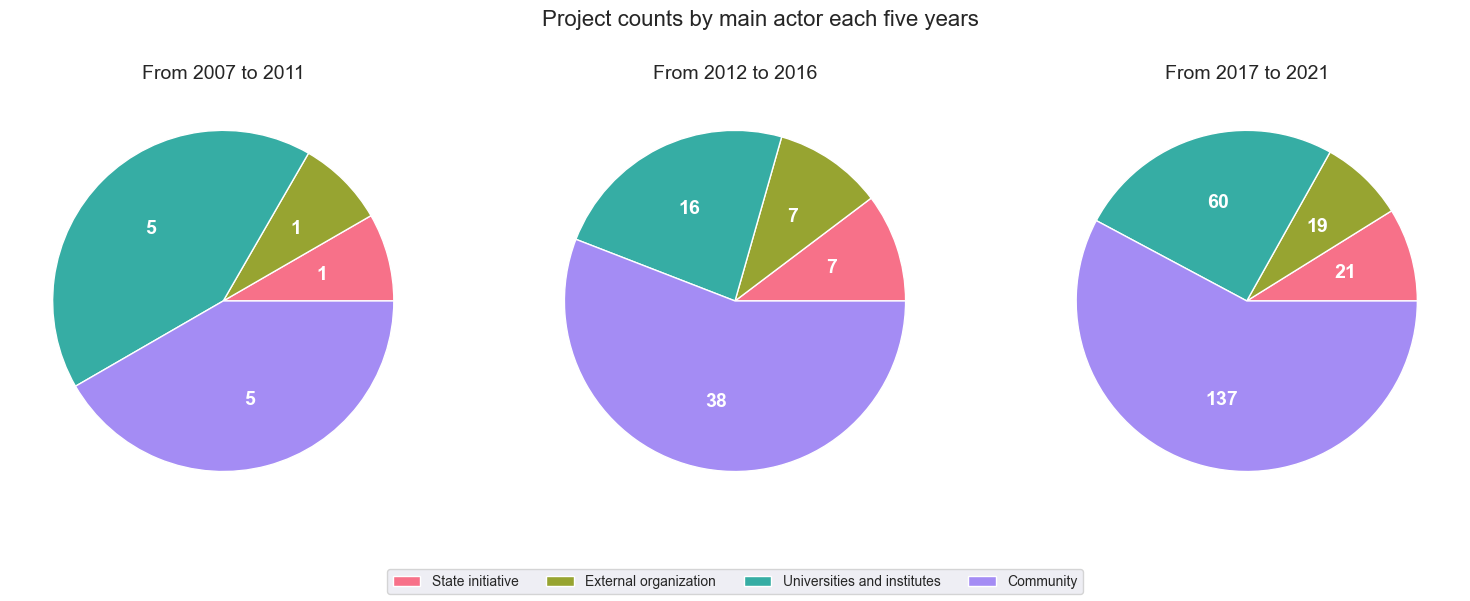

In [52]:
df_projects_by_year=get_projects_by_year(df_projects)
df_projects_by_year.set_index('Year', inplace=True)
df_projects_by_year = df_projects_by_year[origin_columns]

# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Project counts by main actor each five years', fontsize=16)

for i, ax in enumerate(axs.flat):
    start = 2007+(i)*5
    end = start+5
    # Get the sum of projects by origin for the given period
    data = df_projects_by_year.loc[start:end-1].sum()
    # Create the pie chart
    patches, texts, autotexts = ax.pie(data, autopct=lambda p: '{:.0f}'.format(p * sum(data) / 100), colors=color_palette, textprops={'color':"w", 'weight':'bold', 'fontsize':14})
    # Set the title for the subplot
    ax.set_title(f'From {start} to {end-1}')

# Create the legend
fig.legend(patches, data.index, loc="lower center", ncol=4)
plt.subplots_adjust(right=0.85)  # Adjust the right padding to make room for the legend

plt.savefig('images/project_counts_by_origin_each_five_years.png', dpi=300, bbox_inches='tight')
plt.show()